In [1]:
from pathlib import Path

import numpy as np
import xarray as xr

import matplotlib.pyplot as plt

import sys
sys.path.append('/bsuhome/zacharykeskinen/uavsar-coherence/src/funcs')
from xarray_tools import find_cor_ts

In [15]:
def clean_x_y(x, y):
    idx = (~np.isnan(x)) & (~np.isnan(y))
    return x[idx], y[idx]

In [2]:
dss = {fp.stem: xr.open_dataset(fp) for fp in Path('~/scratch/coherence/uavsar').expanduser().glob('*_tau.nc')}

In [3]:
ds = dss['grmesa_v3_tau']
# sub = ds.isel(time1 = 0, time2 = 0).isel(heading = 0).sel(x = slice(-111.80, -1))

In [4]:
# low_melt = sub['cor'].where(sub['model_melt'].sel(model_time = slice(sub.time1, sub.time2)).sum(['model_time']) < 0.01)
# high_melt = sub['cor'].where(sub['model_melt'].sel(model_time = slice(sub.time1, sub.time2)).sum(['model_time']) > 0.06)

# low_vv = low_melt.sel(pol = 'VV').values.ravel()
# low_vh = low_melt.sel(pol = 'VH').values.ravel()
# low_hh = low_melt.sel(pol = 'HH').values.ravel()

# high_vv = high_melt.sel(pol = 'VV').values.ravel()
# high_vh = high_melt.sel(pol = 'VH').values.ravel()
# high_hh = high_melt.sel(pol = 'HH').values.ravel()

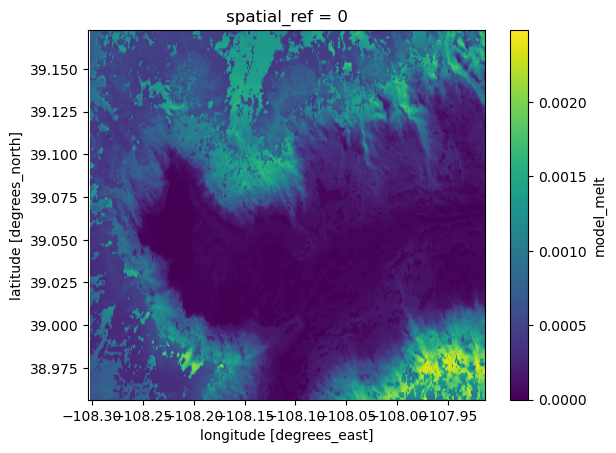

In [13]:
ds.sel(model_time = ds.model_time.dt.month < 3)['model_melt'].mean('model_time').plot()

In [ ]:
cross_diff = (ds['cor'].sel(pol = 'VH') - ds['cor'].sel(pol = 'HV'))
mean_diff = cross_diff.mean(['time1', 'time2', 'heading'])

In [17]:
mean_winter_diff = cross_diff.sel(time1 = ds.time1.dt.month < 3, time2 = ds.time2.dt.month < 3).mean(['time1', 'time2', 'heading'])

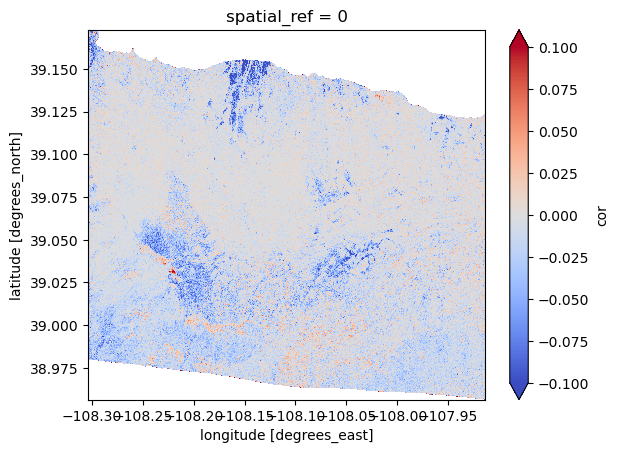

In [18]:
mean_winter_diff.plot(vmax = 0.1, vmin = -0.1, cmap = 'coolwarm')

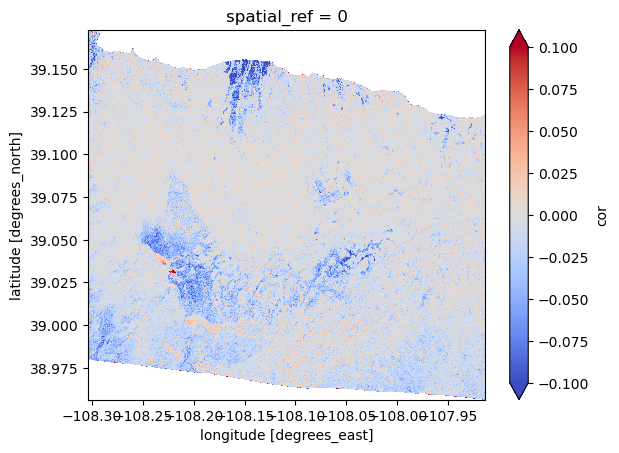

In [6]:
mean_diff.plot(vmax = 0.1, vmin = -0.1, cmap = 'coolwarm')

In [4]:
cross_diff = (ds['cor'].sel(pol = 'VH') - ds['cor'].sel(pol = 'HV'))

In [5]:
mean_diff = cross_diff.mean(['time1', 'time2', 'heading'])

In [67]:
ts = find_cor_ts(ds)

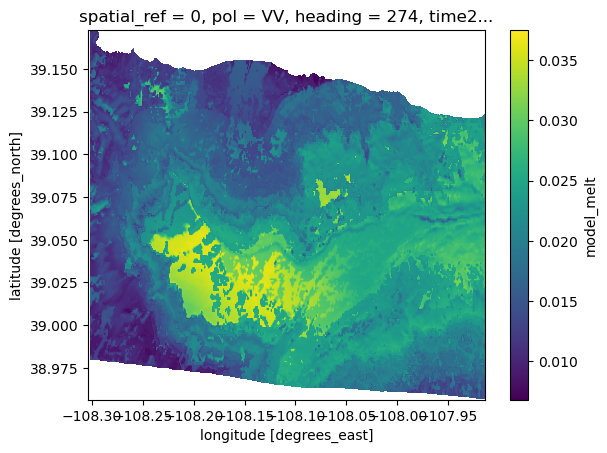

In [71]:
ds['model_melt'].max('model_time').where(~ds['cor'].sel(time1 = ts[t][1], time2 = ts[t][2], heading = ts[t][0], pol = 'VV').isnull()).plot()

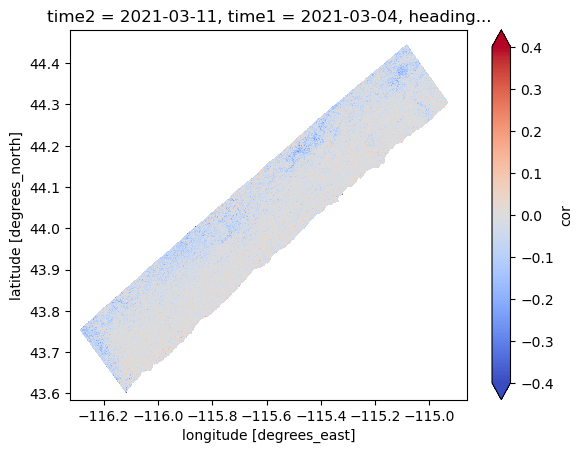

In [55]:
t = 2
cross_diff.sel(time1 = ts[t][1], time2 = ts[t][2], heading = ts[t][0]).plot(vmax = 0.4, vmin = -0.4, cmap = 'coolwarm')

Text(0, 0.5, 'HV')

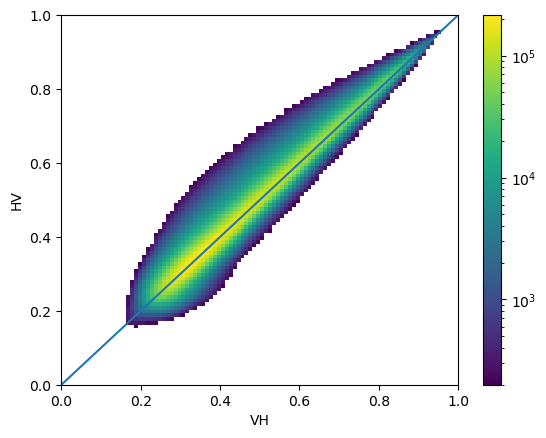

In [56]:
h = plt.hist2d(*clean_x_y(ds['cor'].sel(pol = 'VH').values.ravel(), ds['cor'].sel(pol = 'HV').values.ravel()), bins = 100, norm = 'log', cmin = 200)
plt.colorbar(h[3])
plt.plot([0, 1], [0, 1])
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('VH')
plt.ylabel('HV')

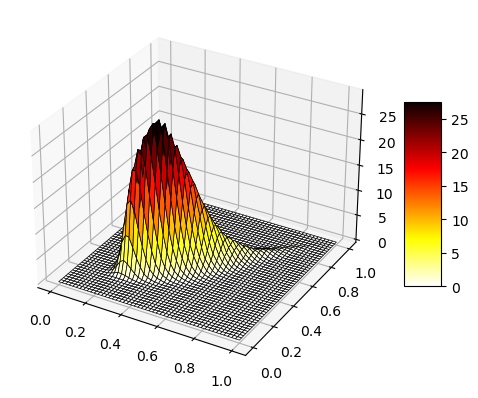

In [11]:
from scipy import stats

X = low_vv
Y = low_hh
Z = low_vh

idx = (~np.isnan(X)) & (~np.isnan(Y)) & (~np.isnan(Z))
X, Y, Z = X[idx], Y[idx ], Z[idx]

kernel = stats.gaussian_kde(np.array([X, Y]), weights=Z)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
xs, ys = np.mgrid[0:1:50j, 0:1:50j]
zs = kernel(np.array([xs.ravel(), ys.ravel()])).reshape(xs.shape)
surf = ax.plot_surface(xs, ys, zs, cmap="hot_r", lw=0.5, rstride=1, cstride=1, ec='k')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


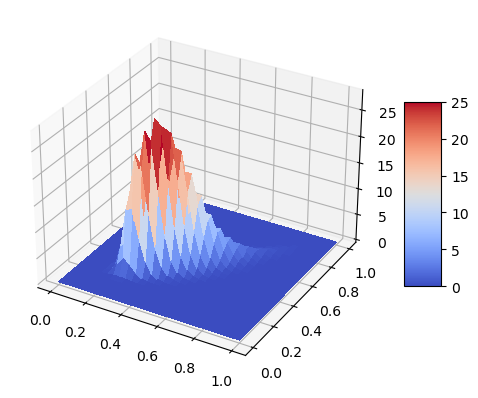

In [9]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
from matplotlib import cm

# Plot the surface.
surf = ax.plot_surface(xs, ys, zs, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
# ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

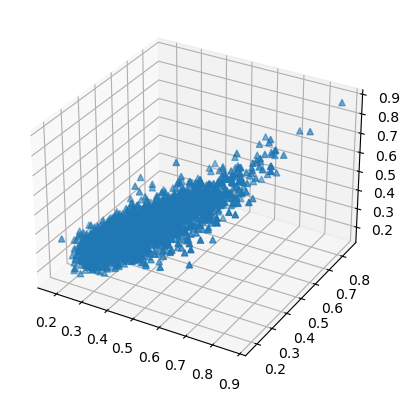

In [10]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(low_vv[::100], low_vh[::100], low_hh[::100], marker=m)


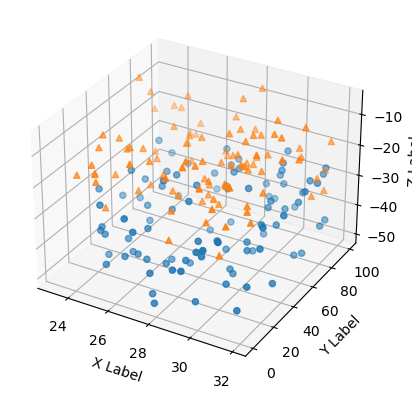

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [5]:
xs

array([28.56614349, 24.65203047, 30.10201749, 24.47470889, 28.66673962,
       27.96019259, 30.9617366 , 24.01420977, 28.80353599, 27.81113967,
       28.86426164, 27.09309953, 23.97192729, 24.35301764, 29.71622144,
       27.46778931, 29.21926175, 29.49561227, 24.55955842, 24.69670107,
       25.87237837, 28.7923058 , 26.16813098, 27.63259246, 28.82798003,
       28.12504572, 28.17192482, 30.93202361, 24.17273397, 25.82414339,
       27.82171555, 23.12405984, 29.7865395 , 28.3625758 , 26.75734896,
       30.15863542, 30.46619022, 27.18926824, 25.75128243, 31.78554634,
       25.21593869, 28.0672355 , 31.96231772, 29.11668734, 31.18730653,
       24.84767153, 24.55999409, 31.7788624 , 24.99758788, 28.42909974,
       29.37623002, 31.8740302 , 31.79077317, 30.24464799, 25.98366516,
       29.33822811, 30.33395232, 31.60746185, 30.34098579, 23.17371367,
       25.00086848, 31.14237104, 28.02176935, 26.86824729, 26.85697507,
       27.73653208, 25.26602214, 31.13261241, 27.61393863, 31.41